----------
# Problem 2
--------------

In [1]:
import random
random.seed(123)

## Importing required libraries

In [2]:
# import important libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
import time, math
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, classification_report
import ast
import copy

In [3]:
df_iot = pd.read_csv("iot_static_data.csv")

# Preprocessing

In [4]:
#I replaced the inf with nan and removed them as it gave better performance

# Replacing infinite with nan

df_iot.replace([ np.inf , -np.inf ] , np.nan, inplace=True)
  
# Dropping all the rows with nan values
df_iot=df_iot.dropna( axis=0, how='any', thresh=None, subset=None, inplace=False)

In [5]:
df_iot.isnull().sum().sum()

0

In [6]:
df_iot['Class'].value_counts()

BENIGN                   22287
mirai_udp_attack          1774
gafgyt_udp_attack          446
gafgyt_junk_attack         377
gafgyt_tcp_attack          213
gafgyt_scan_attack         200
mirai_syn_attack           101
mirai_ack_attack            96
mirai_scan_attack           86
gafgyt_combo_attack         18
mirai_udpplain_attack       11
Name: Class, dtype: int64

In [7]:
#Converting categorical to numeric without Label or hot encoding just to confirm numbers assigned does not change

df_iot["Class"].replace({"BENIGN": 0, "mirai_udp_attack": 1, "gafgyt_udp_attack": 2, "gafgyt_junk_attack": 3, "gafgyt_tcp_attack": 4, "gafgyt_scan_attack": 5, "mirai_syn_attack": 6, "mirai_ack_attack": 7, "mirai_scan_attack": 8, "gafgyt_combo_attack": 9, "mirai_udpplain_attack": 10}, inplace=True)

df_iot["Source"].replace({"Philips B120N10 Baby Monitor": 0, "Provision PT 838 Security Camera": 1,"Provision PT 737E Security Camera": 2,"Danmini Doorbell": 3,"SimpleHome XCS7 1002 WHT Security Camera": 4,"Samsung SNH 1011 N Webcam": 5,"Ennio Doorbell": 6,"Ecobee Thermostat": 7,"SimpleHome XCS7 1003 WHT Security Camera": 8}, inplace=True)



In [8]:
#Preparing labels and features
X, y = df_iot.iloc[:, :-1], df_iot.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split

#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y,random_state=42)



In [10]:
y_train.value_counts()

0     17829
1      1419
2       357
3       302
4       170
5       160
6        81
7        77
8        69
9        14
10        9
Name: Class, dtype: int64

In [11]:
# Normalization

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))


In [12]:
#Copying the training set to use it later for the dynamic case

X_train2 =  copy.deepcopy( X_train 
                        )
y_train2 =  copy.deepcopy( y_train )

In [13]:
#Confusion matrix for testing
def plot_conf(y_true,y_predict):
    plt.figure(figsize=[20, 7])
    plt.subplot(1,2,1)
    title = 'Confusion matrix '
    sns.heatmap(confusion_matrix(y_true, y_predict), annot=True, fmt='')
    plt.title(title)
    plt.xlabel('Predicted label');
    plt.ylabel('True label');

    return

acc of testing : 0.9820382663022257
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4458
           1       0.94      1.00      0.97       355
           2       0.64      1.00      0.78        89
           3       0.96      0.99      0.97        75
           4       0.00      0.00      0.00        43
           5       0.96      0.65      0.78        40
           6       0.86      0.90      0.88        20
           7       0.00      0.00      0.00        19
           8       0.62      0.94      0.74        17
           9       0.00      0.00      0.00         4
          10       1.00      0.50      0.67         2

    accuracy                           0.98      5122
   macro avg       0.63      0.63      0.62      5122
weighted avg       0.97      0.98      0.98      5122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


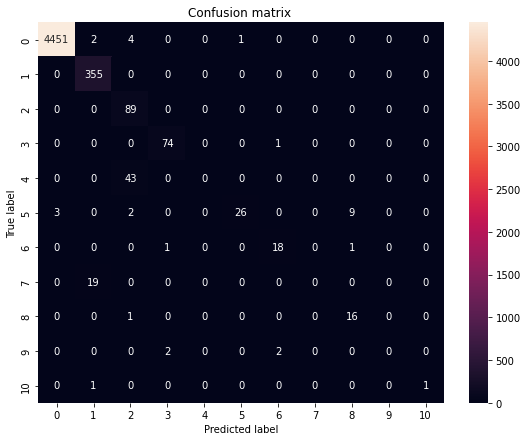

In [14]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=1000, tol=0.01,random_state=0)
 
sgdc.fit(X_train, y_train)

y_sgdc= sgdc.predict(X_test)


print('acc of testing :',accuracy_score(y_test, y_sgdc))

print(classification_report(y_test, y_sgdc))
plot_conf(y_test,y_sgdc)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4458
           1       1.00      1.00      1.00       355
           2       0.73      0.36      0.48        89
           3       0.96      1.00      0.98        75
           4       0.35      0.72      0.47        43
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        17
           9       1.00      0.25      0.40         4
          10       1.00      1.00      1.00         2

    accuracy                           0.99      5122
   macro avg       0.91      0.85      0.85      5122
weighted avg       0.99      0.99      0.99      5122

------------
acc of testing : 0.9857477547832878


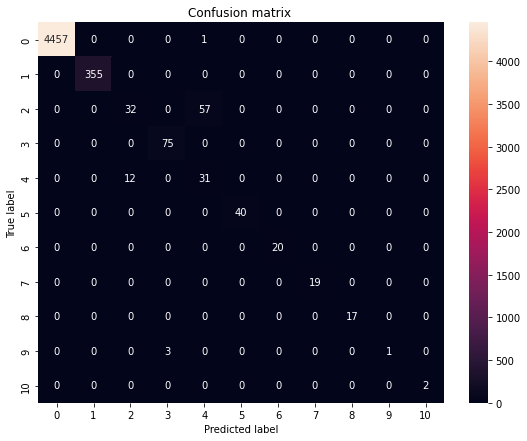

In [15]:
#Model
dt=DecisionTreeClassifier(class_weight='balanced',random_state=0,max_depth=12,criterion='entropy')
dt2=DecisionTreeClassifier(class_weight='balanced',random_state=0,max_depth=12,criterion='entropy')


#Train the model using the training sets 
dt.fit(X_train,y_train)

dt2.fit(X_train2, y_train2)

y_dt=dt.predict(X_test)

print(classification_report(y_test, y_dt))
plot_conf(y_test,y_dt)

print('------------')
print('acc of testing :',accuracy_score(y_test, y_dt))

---------
#Consuming from kafka server
-----------

In [16]:
# Make sure that you have the dependency installed on your system
# If not installed, install by running the following
!pip install kafka-python

In [17]:
import time

# Import the python Consumer Client for Kafka
from kafka import KafkaConsumer

def consume_from_kafkaServer(number_of_rows=5000):

    # instantiate the KafkaConsumer Class using the arguments mentioned.
    # do not change any arguments other than the first positional argument.
    consumer = KafkaConsumer(
        'task2',   # change this to "task2" for the IOT Botnet Detection  ---- important ----
        bootstrap_servers="34.130.121.39:9092",
        sasl_plain_username="student",
        sasl_plain_password="uottawa",
        security_protocol="SASL_PLAINTEXT",
        sasl_mechanism="PLAIN",
        auto_offset_reset='earliest',
        enable_auto_commit=False
    )


    # Data Stream flowing in.
    list_packest = [ ]
    # Data Stream flowing in.
    i = 1
    for message in consumer:
          # print(f"Consuming the {i+1}th data packet!")
      
          data_packet = message.value
          dict_str = data_packet.decode("UTF-8")
          try:
                  mydata = ast.literal_eval(dict_str)
                  list_packest.append( mydata  )
          except:
                  # print("skip {}".format(i))
                  continue;
          
          if i == number_of_rows:
              # print('x')
              data_converted = pd.DataFrame.from_dict( list_packest )
              break
          i = i + 1
    return data_converted     


----------------
# Static case
----------------

In [18]:
def pipeline_static_dynamic(X_train,y_train,X_train2,y_train2,n_rows=10000):
  
  global dt
  global dt2
  global scalar

  n = 100000 // n_rows 
  acc_scores_sta=[]
  f1_scores_sta=[]

  acc_scores_dyn=[]
  f1_scores_dyn=[]
  
  
  for i in range(n):
    data_converted = consume_from_kafkaServer(n_rows)
    #Converting categorical to numeric without Label or hot encoding just to confirm numbers assigned does not change

    data_converted["Class"].replace({"BENIGN": 0, "mirai_udp_attack": 1, "gafgyt_udp_attack": 2, "gafgyt_junk_attack": 3, "gafgyt_tcp_attack": 4, "gafgyt_scan_attack": 5, "mirai_syn_attack": 6, "mirai_ack_attack": 7, "mirai_scan_attack": 8, "gafgyt_combo_attack": 9, "mirai_udpplain_attack": 10}, inplace=True)

    data_converted["Source"].replace({"Philips B120N10 Baby Monitor": 0, "Provision PT 838 Security Camera": 1,"Provision PT 737E Security Camera": 2,"Danmini Doorbell": 3,"SimpleHome XCS7 1002 WHT Security Camera": 4,"Samsung SNH 1011 N Webcam": 5,"Ennio Doorbell": 6,"Ecobee Thermostat": 7,"SimpleHome XCS7 1003 WHT Security Camera": 8}, inplace=True)

        # Replacing infinite with nan
    data_converted.replace([ np.inf , -np.inf ] , np.nan, inplace=True)
      
    # Dropping all the rows with nan values
    data_converted=data_converted.dropna( axis=0, how='any', thresh=None, subset=None, inplace=False)

    X_test_dyn = data_converted.iloc[:, :-1] 
    y_test_dyn = data_converted.iloc[  : , -1] 

    #applying normalization
    
    X_test_dyn = pd.DataFrame(scaler.transform(X_test_dyn))
    
              # for static case

    #testing the models
    y_dt = dt.predict(X_test_dyn)

    #Metrics
    acc=accuracy_score(y_test_dyn,y_dt)
    f1=f1_score(y_test_dyn,y_dt ,average='weighted')
    
    acc_scores_sta.append(acc)
    f1_scores_sta.append(f1)

   #-------------------------------------------------------------------------

                           # For dynamic case

    #testing the models

    y_dt_dyn = dt2.predict(X_test_dyn)

    #Metrics
    acc2=accuracy_score(y_test_dyn,y_dt_dyn)
    f1_2=f1_score(y_test_dyn,y_dt_dyn ,average='weighted')

    acc_scores_dyn.append(acc2)
    f1_scores_dyn.append(f1_2)

    # Dropping last n rows using drop then concatenating the tested ones
    X_train2.drop(X_train2.tail(n_rows).index,inplace = True)
    X_train2=pd.concat([X_test_dyn, X_train2], ignore_index=True, sort=True)

    y_train2.drop(y_train2.tail(n_rows).index,inplace = True)
    y_train2=pd.concat([y_test_dyn, y_train2], ignore_index=True, sort=True)
    
    #re-training again the algorithm
    dt2.fit(X_train2, y_train2)

    
  return acc_scores_sta,f1_scores_sta,acc_scores_dyn,f1_scores_dyn

  

In [19]:
acc_scores_sta=[]
f1_scores_sta=[]
acc_scores_dyn=[]
f1_scores_dyn=[]

acc_scores_sta , f1_scores_sta , acc_scores_dyn , f1_scores_dyn = pipeline_static_dynamic(X_train,y_train,X_train2,y_train2)

In [20]:
print('accuracy scores of static :',acc_scores_sta)
print('F1-score: scores of static :',f1_scores_sta)
print('----------------------------------------------------------------------------------------------------------')
print('accuracy scores of Dynamic :',acc_scores_dyn)
print('F1-score: scores of Dynamic :',f1_scores_dyn)

accuracy scores of static : [0.9854, 0.9852, 0.9848, 0.9854, 0.9852, 0.9854, 0.9854, 0.9848, 0.9852, 0.9848]
F1-score: scores of static : [0.985254889294951, 0.9851276676367521, 0.9847313720073054, 0.985254889294951, 0.9851276676367521, 0.985254889294951, 0.985254889294951, 0.9847313720073054, 0.9851276676367521, 0.9847313720073054]
----------------------------------------------------------------------------------------------------------
accuracy scores of Dynamic : [0.9854, 0.9864, 0.9892, 0.9893, 0.9895, 0.9893, 0.9893, 0.9892, 0.9895, 0.9894]
F1-score: scores of Dynamic : [0.985254889294951, 0.985872049689441, 0.9894313850668879, 0.9894935207843774, 0.9897270126329472, 0.9894935207843774, 0.9894935207843774, 0.9894313850668879, 0.9897270126329472, 0.9896171359715882]


-----
# Plotting results
-----

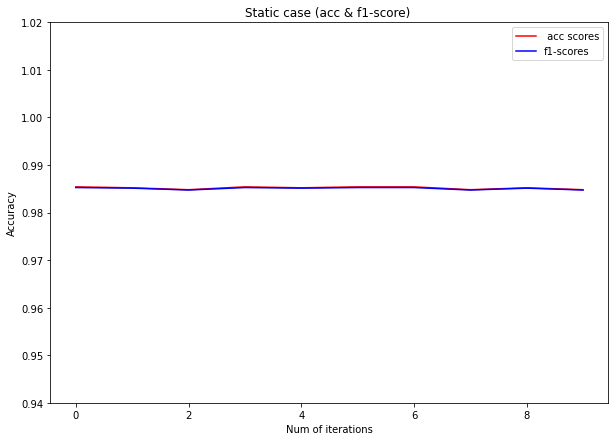

In [25]:
x = list(range(10))


# From here the plotting starts
plt.plot(x, acc_scores_sta, c='r', label=' acc scores')
plt.plot(x, f1_scores_sta, c='b', label='f1-scores')

plt.xlabel('Num of iterations')
plt.ylabel('Accuracy')
plt.title('Static case (acc & f1-score) ')
plt.ylim(0.94, 1.02)
plt.rcParams["figure.figsize"] = (10,7)


plt.legend()
plt.show()


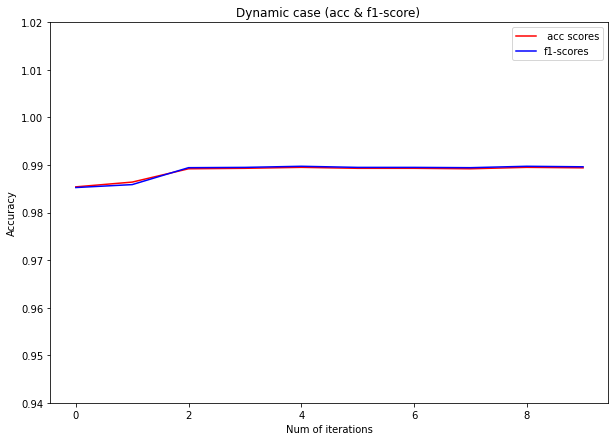

In [22]:

x = list(range(10))


plt.plot(x, acc_scores_dyn, c='r', label=' acc scores')
plt.plot(x, f1_scores_dyn, c='b', label='f1-scores')

plt.xlabel('Num of iterations')
plt.ylabel('Accuracy')
plt.title('Dynamic case (acc & f1-score) ')
plt.ylim(0.94, 1.02)
plt.rcParams["figure.figsize"] = (10,7)


plt.legend()
plt.show()

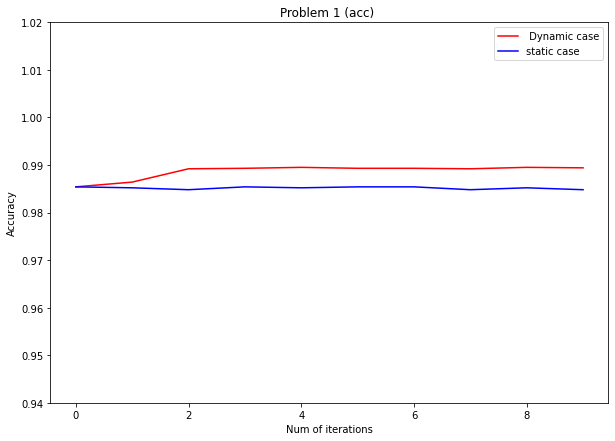

In [23]:

x = list(range(10))

plt.plot(x, acc_scores_dyn, c='r', label=' Dynamic case')
plt.plot(x, acc_scores_sta, c='b', label='static case')

plt.xlabel('Num of iterations')
plt.ylabel('Accuracy')
plt.title('Problem 1 (acc) ') 
plt.ylim(0.94, 1.02)
plt.rcParams["figure.figsize"] = (10,7)


plt.legend()
plt.show()

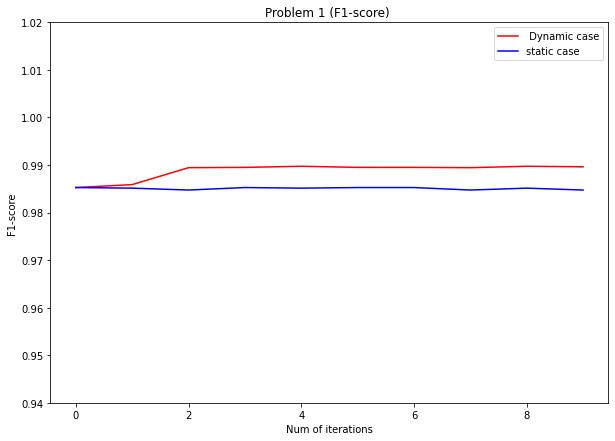

In [24]:
import matplotlib.pyplot as plt

x = list(range(10))


plt.plot(x, f1_scores_dyn, c='r', label=' Dynamic case')
plt.plot(x, f1_scores_sta, c='b', label='static case')

plt.xlabel('Num of iterations')
plt.ylabel('F1-score')
plt.title('Problem 1 (F1-score) ')
plt.ylim(0.94, 1.02)
plt.rcParams["figure.figsize"] = (10,7)


plt.legend()
plt.show()